# 인공지능 과제3
## 문제 아래에 본인의 답을 서술하고, [3, 4, 5, 6, 7, 8번]에 대해서는 코드를 Assignment.zip 파일로 압축하여 따로 제출하시오. (단, 코드 파일명은 Assignment-문제번호.py 로 할 것)

## 문제에서 요구하는 이미지 및 결과는 코드 실행 결과를 캡처해서 각 문제 아래에 반드시 첨부해주세요. (코드만 제출 시 감점)

### 교재 코드에 오류가 있을 수도 있으니, LMS 강의자료실에 올린 ipynb 파일 코드를 참고할 것.



In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI/assignment')


Mounted at /content/drive


In [ ]:
!pip install gym upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# 01. 
## [예제 9-2]에서 생략된 상태에 대한 확률 분포를 추가해 완벽한 최적 정책을 제시하시오.
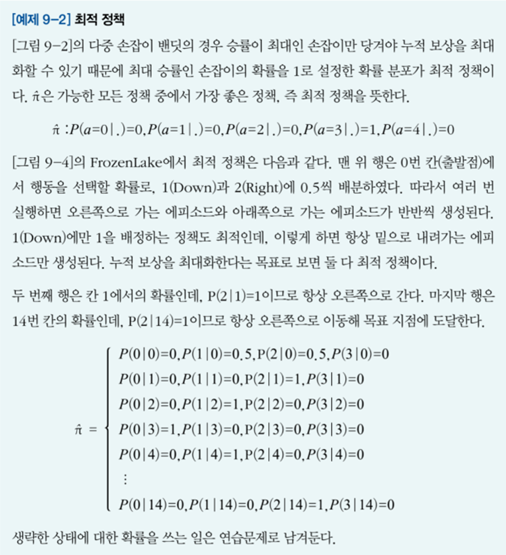
 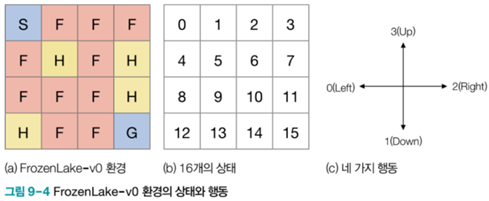


P(0│5)=0,  P(1│5)=0,   P(2│5)=0,   P(3│5)=0  
P(0│6)=0,  P(1│6)=1,   P(2│6)=0,   P(3│6)=0   
P(0│7)=0,  P(1│7)=0,   P(2│7)=0,   P(3│7)=0   
P(0│8)=0,  P(1│8)=0,   P(2│8)=1,   P(3│8)=0   
P(0│9)=0,  P(1│9)=0.5, P(2│9)=0.5, P(3│9)=0   
P(0│10)=0, P(1│10)=1,  P(2│10)=0,  P(3│10)=0   
P(0│11)=0, P(1│11)=0,  P(2│11)=0,  P(3│11)=0   
P(0│12)=0, P(1│12)=0,  P(2│12)=0,  P(3│12)=0   
P(0│13)=0, P(1│13)=0,  P(2│13)=1,  P(3│13)=0   


# 02. 
## [예제 9-3]에서 v_π1 (8)을 계산하시오.
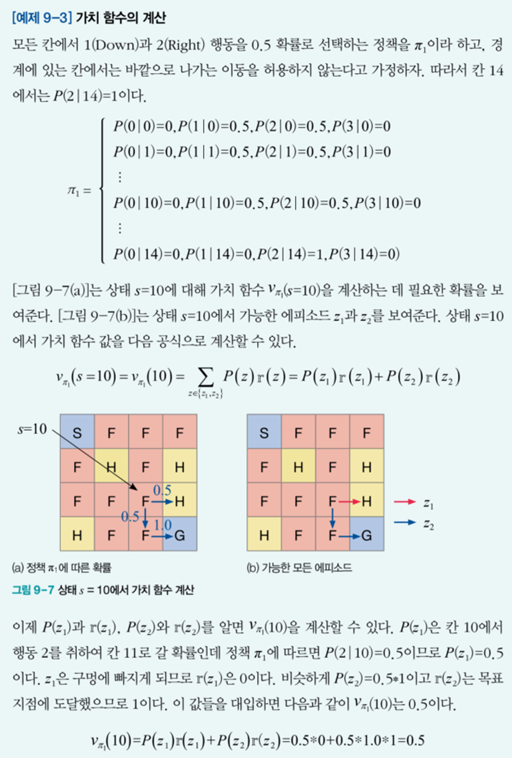

V_(π_1 ) (8)=P(z_1 )r(z_1 )+P(z_2 )r(z_2 )+P(z_3 )r(z_3 )+P(z_4 )r(z_4 )
             =0.5×0+0.5×0.5×1×1+0.5×0.5×0.5×1+0.5×0.5×0.5×0  
             =0+0.25+0.125+0  
             =0.375  


# 03.
## 9-1.py를 ε을 0.0, 0.1, 0.2, 0.3, …, 0.9, 1.0으로 변화시키면서 순 수익을 계산해 그래프를 
## 그리는 버전으로 확장하고, 그래프를 도시하시오. (x축: epsilon, y축: 순 수익)

epsilon:  0.0
손잡이별 승리 확률: ['0.4048', '0.0000', 0.0, 0.0, 0.0]
손잡이별 수익($): ['-1903', '-1', '0', '0', '0']
순 수익($): -1904
epsilon:  0.1
손잡이별 승리 확률: ['0.3969', '0.1429', '0.5157', '0.6028', '0.2563']
손잡이별 수익($): ['-54', '-150', '8', '1865', '-97']
순 수익($): 1572
epsilon:  0.2
손잡이별 승리 확률: ['0.3990', '0.1361', '0.5351', '0.5964', '0.2592']
손잡이별 수익($): ['-78', '-278', '61', '1534', '-197']
순 수익($): 1042
epsilon:  0.3
손잡이별 승리 확률: ['0.4192', '0.1156', '0.5214', '0.6016', '0.2513']
손잡이별 수익($): ['-96', '-479', '25', '1549', '-287']
순 수익($): 712
epsilon:  0.4
손잡이별 승리 확률: ['0.4198', '0.1216', '0.5270', '0.5968', '0.2580']
손잡이별 수익($): ['-128', '-610', '44', '1310', '-392']
순 수익($): 224
epsilon:  0.5
손잡이별 승리 확률: ['0.4069', '0.1085', '0.5112', '0.6035', '0.2605']
손잡이별 수익($): ['-193', '-808', '23', '1222', '-480']
순 수익($): -236
epsilon:  0.6
손잡이별 승리 확률: ['0.3740', '0.0992', '0.5179', '0.5915', '0.2619']
손잡이별 수익($): ['-308', '-954', '44', '940', '-580']
순 수익($): -858
epsilon:  0.7
손잡이별 승리 확률: ['0.3846',

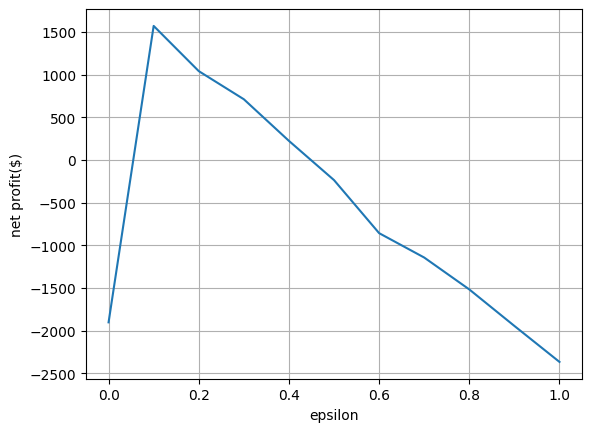

In [61]:
import numpy as np

# 다중 손잡이 밴딧 문제 설정
arms_profit=[0.4, 0.12, 0.52, 0.6, 0.25]
n_arms=len(arms_profit)

n_trial=10000 # 손잡이를 당기는 횟수(에피소드 길이)

# 손잡이 당기는 행위를 시뮬레이션하는 함수(handle은 손잡이 번호)
def pull_bandit(handle):
    q=np.random.random()
    if q<arms_profit[handle]:
        return 1
    else:
        return -1

# ε-탐욕을 구현하는 함수
def epsilon_greedy(eps):
    episode=[]
    num=np.zeros(n_arms) # 손잡이별로 당긴 횟수
    wins=np.zeros(n_arms) # 손잡이별로 승리 횟수
    for i in range(n_trial):
        r=np.random.random()
        if(r<eps or sum(wins)==0): # 확률 eps로 임의 선택
            h=np.random.randint(0,n_arms)
        else:
            prob=np.asarray([wins[i]/num[i] if num[i]>0 else 0.0 for i in range(n_arms)])
            prob=prob/sum(prob)
            #h=np.random.choice(range(n_arms),p=prob) # original program 9-1
            h=np.argmax(prob) # revised code - 항상 최고의 보상을 주는 손잡이를 고름
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode, (num,wins)

revenus=[]
eps=[]

for i in range(11):
    eps.append(i/10)
    print("epsilon: ",eps[i])
    e,r=epsilon_greedy(eps[i])
    print("손잡이별 승리 확률:", ["%6.4f"% (r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
    print("손잡이별 수익($):",["%d"% (2*r[1][i]-r[0][i]) for i in range(n_arms)])
    revenus.append(sum(np.asarray(e)[:,1]))
    print("순 수익($):",revenus[i])
    

import matplotlib.pyplot as plt
plt.plot(eps,revenus)
plt.ylabel('net profit($)')
plt.xlabel('epsilon')
plt.grid()
plt.show()

# 04.
## 9-4.py는 바깥으로 나가는 행동에 대해서도 확률을 부여한다. 
## 바깥으로 나가는 행동의 확률이 0이 되도록 프로그램을 개선하고 실행결과를 첨부하시오.

In [59]:
import gym
import numpy as np

env = gym.make('FrozenLake-v1', is_slippery=False)  # 환경 생성
Q = np.zeros([env.observation_space.n, env.action_space.n])  # Q 배열 초기화

rho = 0.90  # 학습률
lamda = 0.99  # 할인율
eps = 1.0  # 엡실론
eps_decay = 0.999  # 삭감 비율

n_episode = 3000
length_episode = 100

# 최적 행동 가치 함수 찾기(탐사와 탐험의 균형 추구)
for i in range(n_episode):
    s=env.reset() # 새로운 에피소드 시작
    s=s[0]
    for j in range(length_episode):
        r=np.random.random()
        eps=max(0.01,eps*eps_decay) # 엡시론을 조금씩 줄여나감
        if(r<eps): # eps 비율만큼 임의 선택
            a=np.random.randint(0,env.action_space.n)
        else:
            argmaxs=np.argwhere(Q[s,:]==np.max(Q[s,:])).flatten().tolist()
            a=np.random.choice(argmaxs)
        # s1,r,done,_=env.step(a)
        s1,r,done,truncated,_=env.step(a)
        if(s==s1):
            Q[s, a]=0
        else:
            Q[s,a]=Q[s,a]+rho*(r+lamda*np.max(Q[s1,:])-Q[s,a])
        s=s1
        if done or truncated:
            break



np.set_printoptions(precision=2)
print(Q)


[[0.   0.95 0.93 0.  ]
 [0.94 0.   0.   0.  ]
 [0.84 0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.96 0.   0.94]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.97 0.95]
 [0.96 0.98 0.98 0.  ]
 [0.97 0.99 0.   0.97]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.99 0.97]
 [0.98 0.   1.   0.98]
 [0.   0.   0.   0.  ]]


# 05. 
## fashion MNIST 데이터셋에 대해 10-2.py를 적용하고 오토인코더의 생성 모델로서의 
## 품질을 평가하기 위해 다음을 제시하시오. 
### 1) 마지막 epoch에서의 validation 데이터 셋의 mse loss 값 
### 2) x_test 원본 이미지, 생성된 이미지 10개씩 도시.

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 32)                100

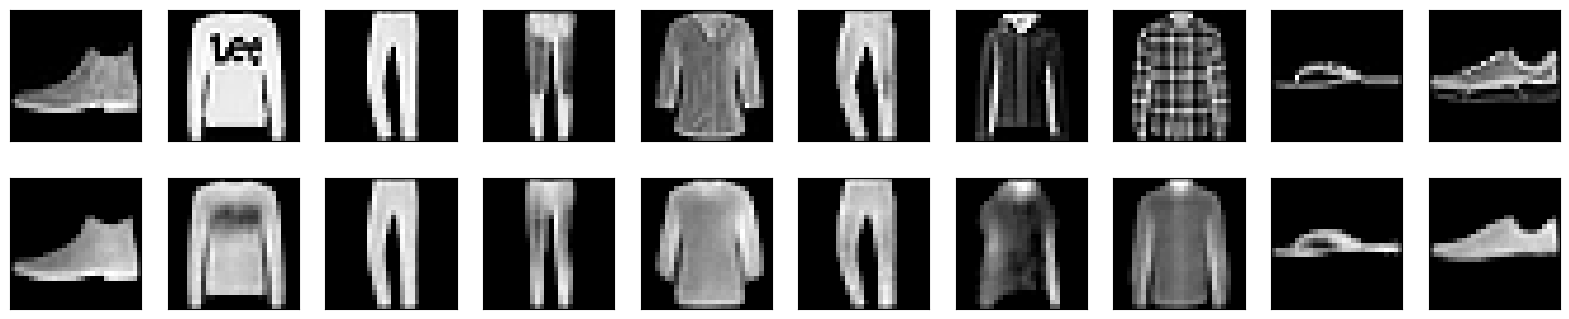

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# MNIST 데이터를 읽고 신경망에 입력할 준비
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

zdim=32 # 잠복 공간의 차원

# 오토인코더의 인코더 부분 설계
encoder_input=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1))(encoder_input)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x=Flatten()(x)
encoder_output=Dense(zdim)(x)
model_encoder=Model(encoder_input,encoder_output)
model_encoder.summary()

# 오토인코더의 디코더 부분 설계
decoder_input=Input(shape=(zdim,))
x=Dense(3136)(decoder_input)
x=Reshape((7,7,64))(x)
x=Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x=Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2DTranspose(32,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2DTranspose(1,(3,3),activation='relu',padding='same',strides=(1,1))(x)
decoder_output=x
model_decoder=Model(decoder_input,decoder_output)
model_decoder.summary()

# 인코더와 디코더를 결합하여 오토인코더 모델 구축
model_input=encoder_input
model_output=model_decoder(encoder_output)
model=Model(model_input,model_output)

# 오토인코더 학습
model.compile(optimizer='Adam',loss='mse')
validation=model.fit(x_train,x_train,epochs=5,batch_size=128,shuffle=True,validation_data=(x_test,x_test))


# 복원 실험 1: x_test를 복원하는 예측 실험
decoded_img=model.predict(x_test)
print()
print("마지막 epoch에서의 validation 데이터 셋의 mse loss 값:",validation.history['loss'][-1])
print()
import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_img[i].reshape(28, 28),cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()


# 06. 
## MNIST 데이터셋에 대해 10-2.py를 10개 숫자 부류 중 [2, 7] 두개 부류에만 적용하는 
## 버전으로 수정하고 품질을 평가하기 위해 다음을 제시하시오. 
### 1) 마지막 epoch에서의 validation 데이터 셋의 mse loss 값 
### 2) x_test 원본 이미지, 생성된 이미지 10개씩 도시

Model: "model_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_74 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_164 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 conv2d_165 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 conv2d_166 (Conv2D)         (None, 7, 7, 64)          36928     
                                                                 
 conv2d_167 (Conv2D)         (None, 7, 7, 64)          36928     
                                                                 
 flatten_33 (Flatten)        (None, 3136)              0         
                                                                 
 dense_66 (Dense)            (None, 100)               313

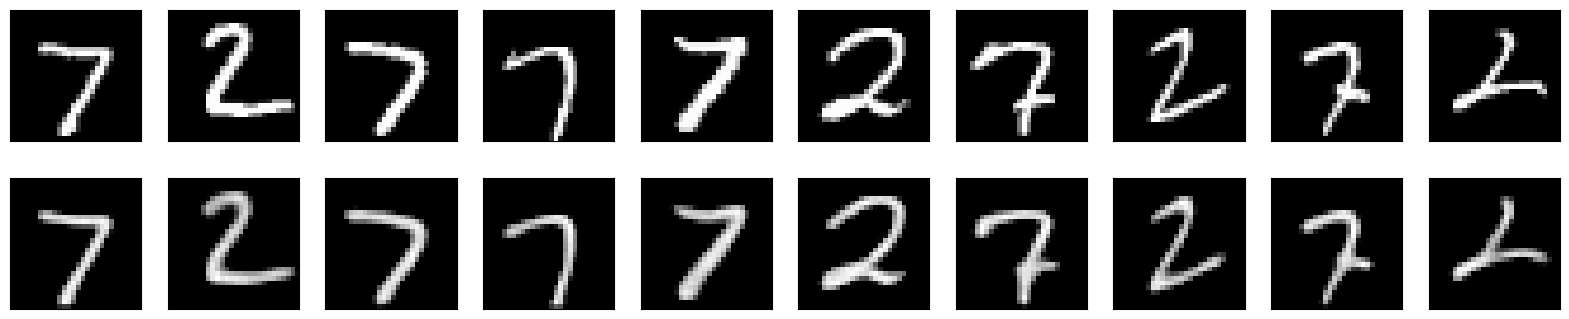

In [51]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# MNIST 데이터를 읽고 신경망에 입력할 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train,x_test=x_train[np.isin(y_train,[2,7])],x_test[np.isin(y_test,[2,7])]


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

zdim=32 # 잠복 공간의 차원

# 오토인코더의 인코더 부분 설계
encoder_input=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1))(encoder_input)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x=Flatten()(x)
encoder_output=Dense(zdim)(x)
model_encoder=Model(encoder_input,encoder_output)
model_encoder.summary()

# 오토인코더의 디코더 부분 설계
decoder_input=Input(shape=(zdim,))
x=Dense(3136)(decoder_input)
x=Reshape((7,7,64))(x)
x=Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x=Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2DTranspose(32,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2DTranspose(1,(3,3),activation='relu',padding='same',strides=(1,1))(x)
decoder_output=x
model_decoder=Model(decoder_input,decoder_output)
model_decoder.summary()

# 인코더와 디코더를 결합하여 오토인코더 모델 구축
model_input=encoder_input
model_output=model_decoder(encoder_output)
model=Model(model_input,model_output)

# 오토인코더 학습
model.compile(optimizer='Adam',loss='mse')
validation=model.fit(x_train,x_train,epochs=5,batch_size=128,shuffle=True,validation_data=(x_test,x_test))


# 복원 실험 1: x_test를 복원하는 예측 실험
decoded_img=model.predict(x_test)
print()
print("마지막 epoch에서의 validation 데이터 셋의 mse loss 값:",validation.history['loss'][-1])
print()

import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_img[i].reshape(28, 28),cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()


# 07. 
## 10-4.py를 10개 숫자 부류 중 [5] 한개 부류에만 적용하는 버전으로 수정하고 품질을 
## 평가하기 위해 다음을 제시하시오. 
### 1) 마지막 iteration에서의 판별망(D)의 real data에 대한 분별 accuracy, fake data에 대한 분별 accuracy 
### 2) 학습을 마친 후 50개의 생성된 이미지 도시.
### +7번 학습 시 iteration(교재 코드에서는 epoch로 표기됨)값을 1000으로 낮춰 적용하세요.


1/1 [==============================] - 0s 19ms/step


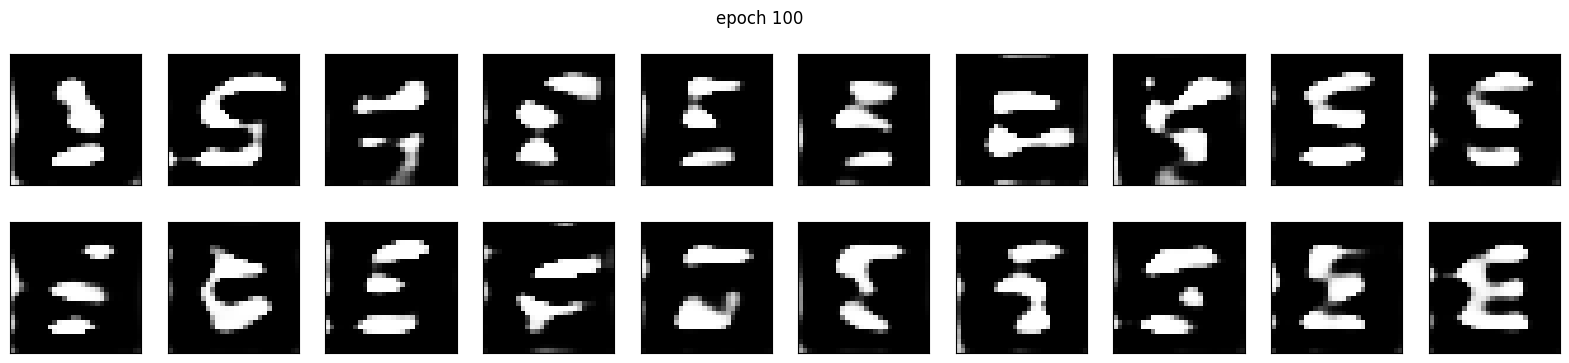

1/1 [==============================] - 0s 17ms/step


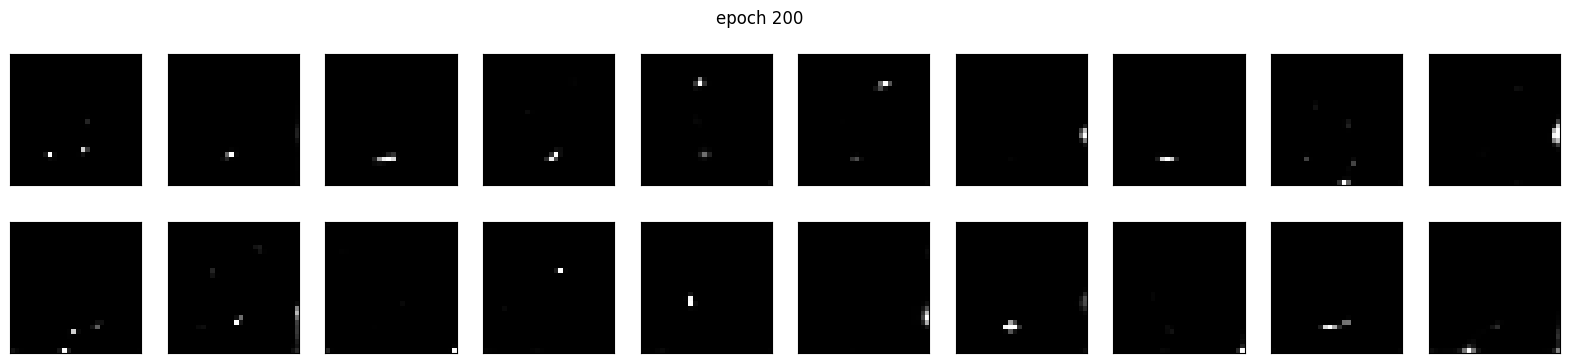

1/1 [==============================] - 0s 21ms/step


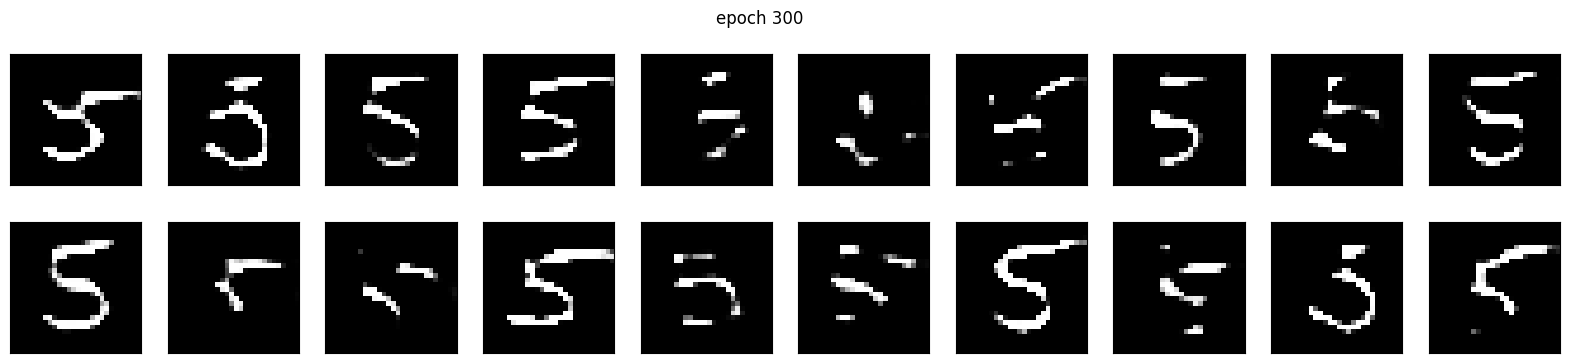

1/1 [==============================] - 0s 19ms/step


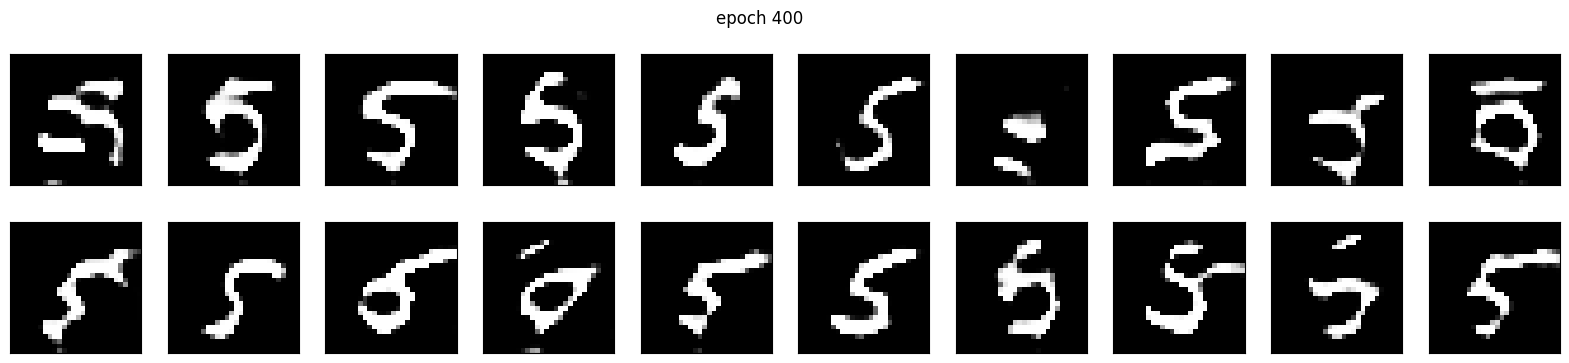

1/1 [==============================] - 0s 17ms/step


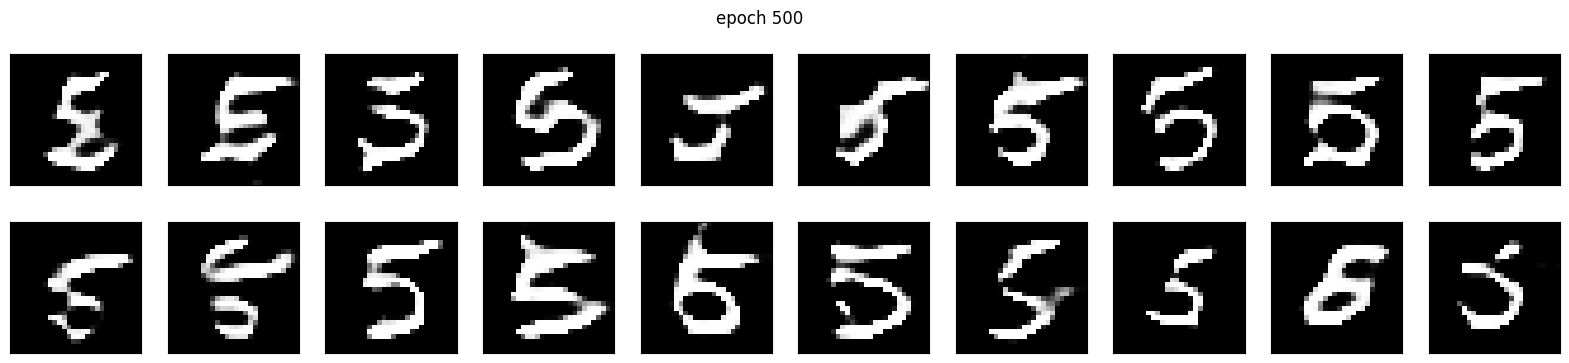

1/1 [==============================] - 0s 26ms/step


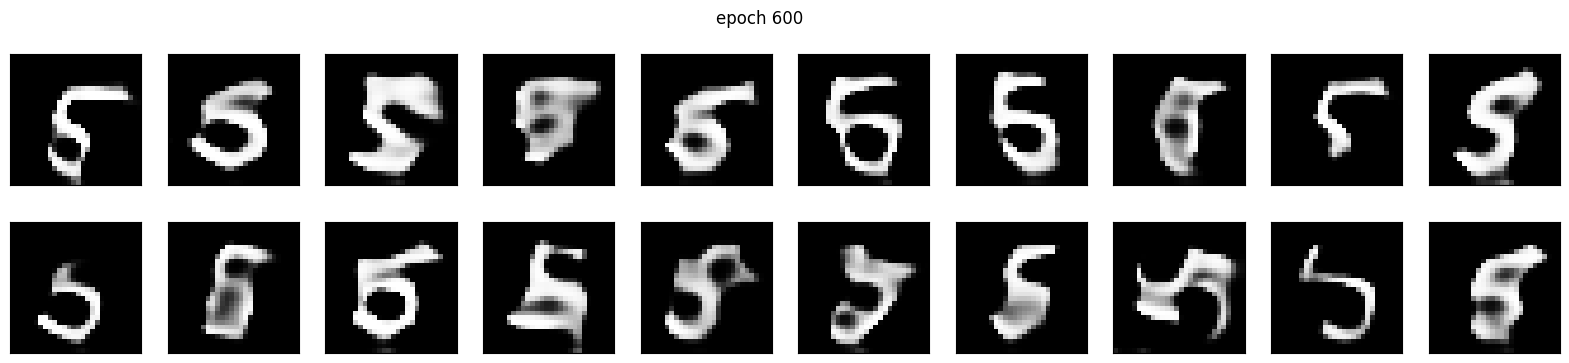

1/1 [==============================] - 0s 18ms/step


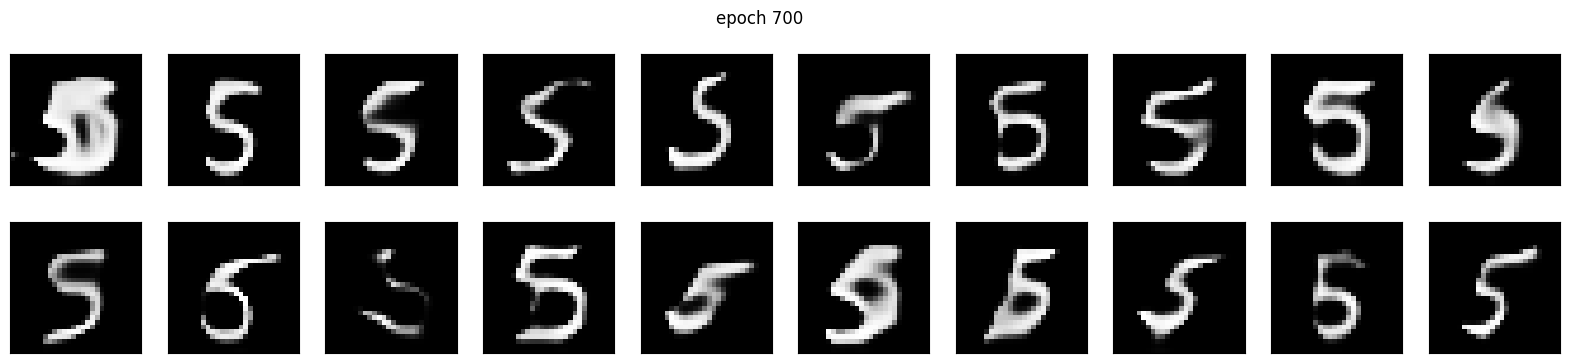

1/1 [==============================] - 0s 20ms/step


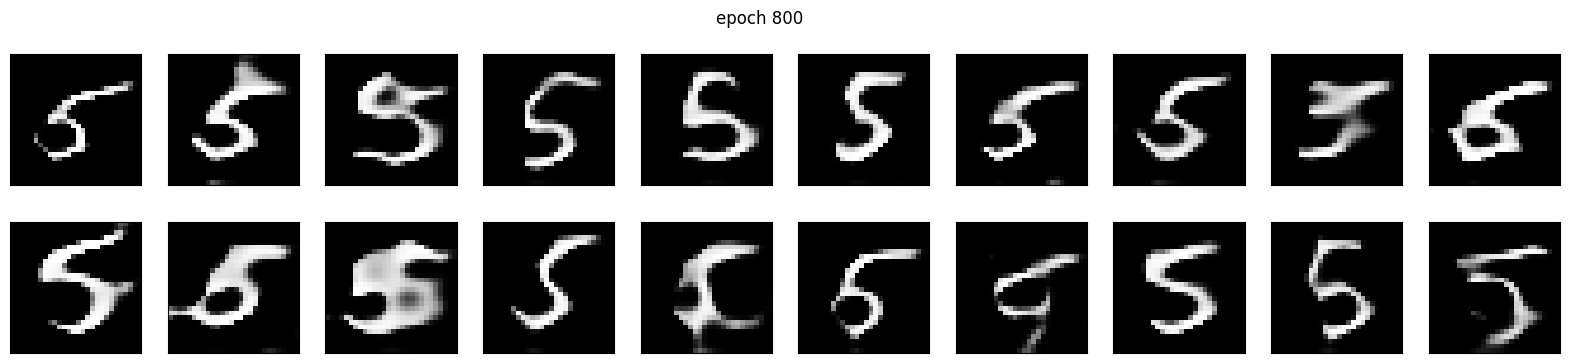

1/1 [==============================] - 0s 20ms/step


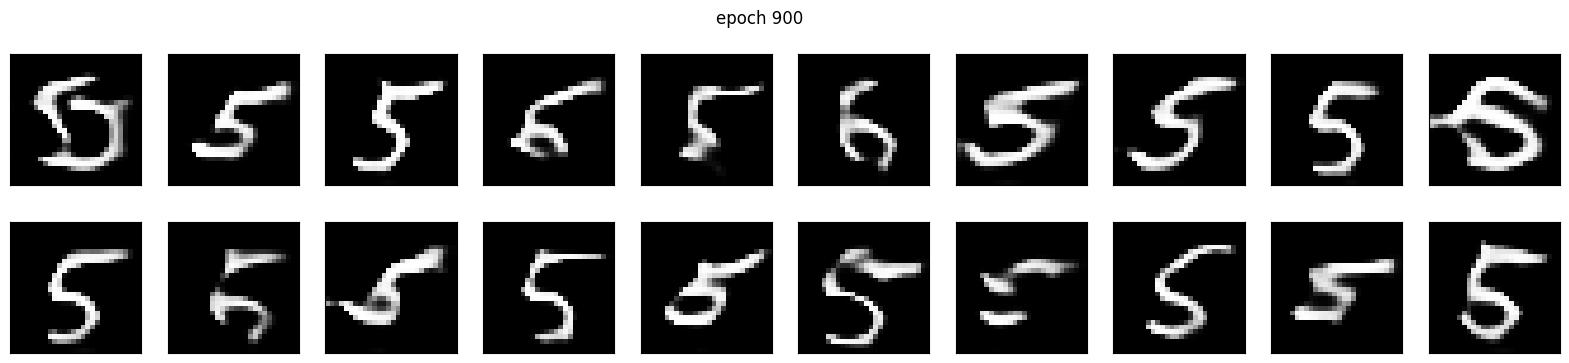

1/1 [==============================] - 0s 19ms/step


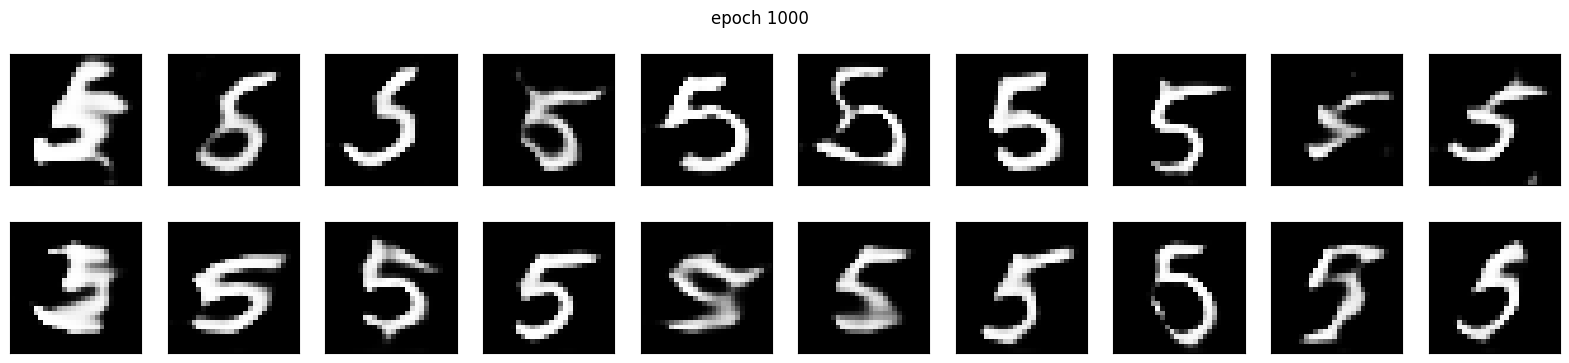


마지막 iteration에서의 판별망(D)의 real data에 대한 분별 accuracy:  0.75
마지막 iteration에서의 판별망(D)의 fake data에 대한 분별 accuracy:  0.65625

2/2 [==============================] - 0s 7ms/step


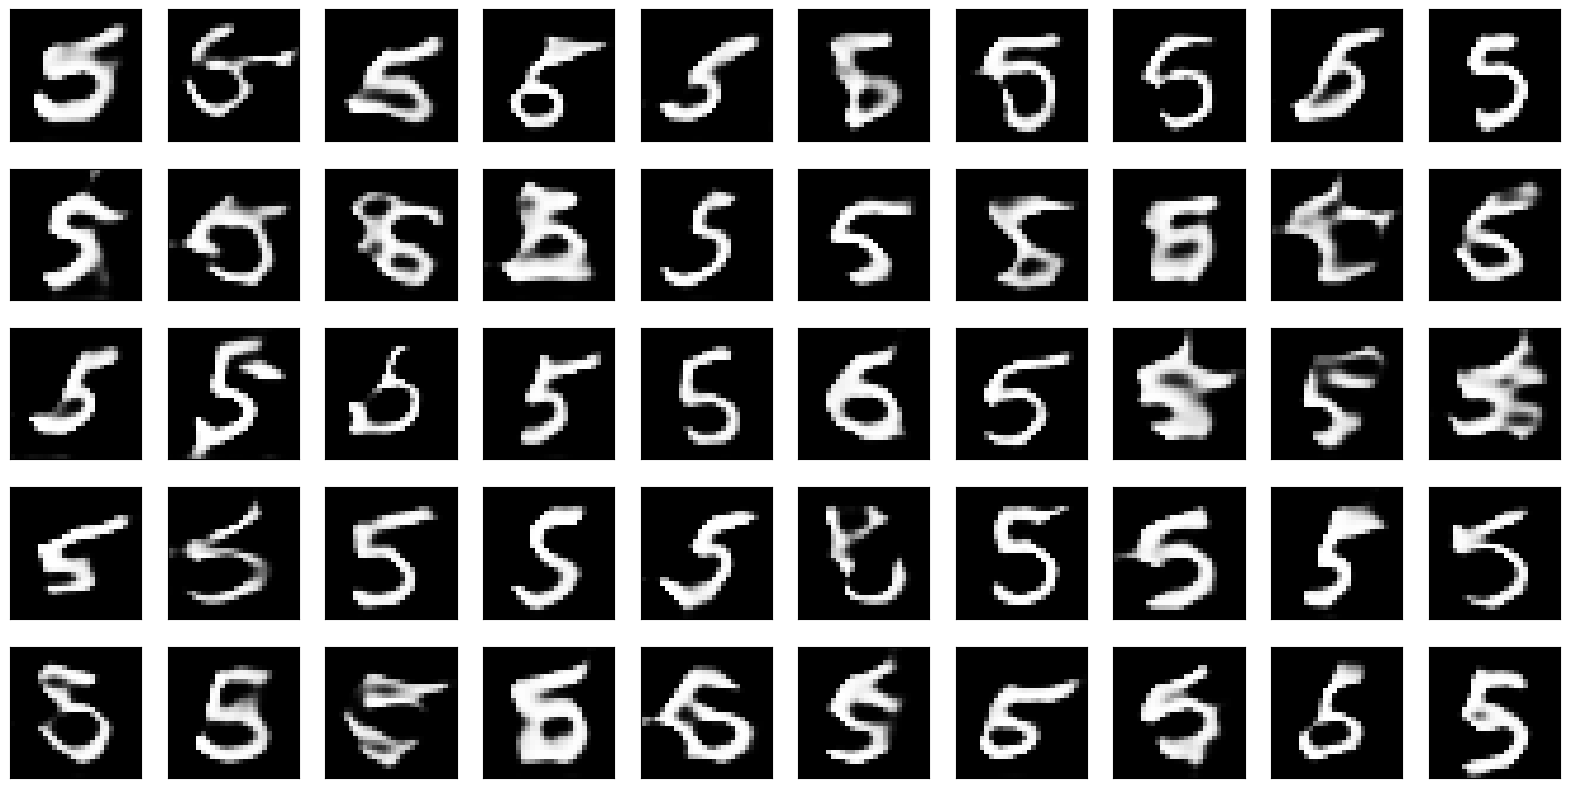

In [54]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Activation,Dense,Flatten,Reshape,Conv2D,Conv2DTranspose,Dropout,BatchNormalization,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=mnist.load_data()

# 5에 해당하는 이미지 데이터만 선택
x_train=x_train[np.isin(y_train,[5])]

x_train = (x_train.astype('float32')/255.0)*2.0-1.0 # [-1,1] 구간
x_test = (x_test.astype('float32')/255.0)*2.0-1.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

batch_siz=64
iterations=1000 # epochs가 아닌 iterations
dropout_rate=0.4
batch_norm=0.9
zdim=100 # 잠복 공간의 차원

discriminator_input=Input(shape=(28, 28, 1)) # 분별망 D 설계
x=Conv2D(64,(5,5),activation='relu',padding='same',strides=(2,2))(discriminator_input)
x=Dropout(dropout_rate)(x)
x=Conv2D(64,(5,5),activation='relu',padding='same',strides=(2,2))(x)
x=Dropout(dropout_rate)(x)
x=Conv2D(128,(5,5),activation='relu',padding='same',strides=(2,2))(x)
x=Dropout(dropout_rate)(x)
x=Conv2D(128,(5,5),activation='relu',padding='same',strides=(1,1))(x)
x=Dropout(dropout_rate)(x)
x=Flatten()(x)
discriminator_output=Dense(1,activation='sigmoid')(x)
discriminator=Model(discriminator_input,discriminator_output)

generator_input=Input(shape=(zdim,)) # 생성망 G 설계
x=Dense(3136)(generator_input)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Reshape((7,7,64))(x)
x=UpSampling2D()(x)
x=Conv2D(128,(5,5),padding='same')(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=UpSampling2D()(x)
x=Conv2D(64,(5,5),padding='same')(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Conv2D(64,(5,5),padding='same')(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Conv2D(1,(5,5),activation='tanh',padding='same')(x)
generator_output=x
generator=Model(generator_input,generator_output)

discriminator.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

discriminator.trainable=False
gan_input=Input(shape=(zdim,))
gan_output=discriminator(generator(gan_input))
gan=Model(gan_input,gan_output)
gan.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

real_acc=[]
fake_acc=[]
def train_discriminator(x_train):
    c=np.random.randint(0,x_train.shape[0],batch_siz)
    real=x_train[c]
    real_acc.append(discriminator.train_on_batch(real,np.ones((batch_siz,1))))

    p=np.random.normal(0,1,(batch_siz,zdim))
    fake=generator.predict(p)
    fake_acc.append(discriminator.train_on_batch(fake,np.zeros((batch_siz,1))))

    

def train_generator():
    p=np.random.normal(0,1,(batch_siz,zdim))
    gan.train_on_batch(p,np.ones((batch_siz,1)))



for i in range(1, iterations+1): # 학습을 수행 (5000 iterations * 64 batch size / 60000 train size = 5.333 epochs)
    train_discriminator(x_train)
    train_generator()
    if(i%100==0): # 학습 도중 100세대마다 중간 상황 출력 (batch_size*100=6400개 sample 학습시 마다)
        plt.figure(figsize=(20, 4))
        plt.suptitle('epoch '+str(i))
        for k in range(20):
            plt.subplot(2,10,k+1)
            img=generator.predict(np.random.normal(0,1,(1,zdim)))
            plt.imshow(img[0].reshape(28,28),cmap='gray')
            plt.xticks([]); plt.yticks([])
        plt.show()

print()
print("마지막 iteration에서의 판별망(D)의 real data에 대한 분별 accuracy: ",real_acc[-1][1])
print("마지막 iteration에서의 판별망(D)의 fake data에 대한 분별 accuracy: ",fake_acc[-1][1])
print()

imgs=generator.predict(np.random.normal(0,1,(50,zdim)))
plt.figure(figsize=(20,10)) # 학습을 마친 후 50개 샘플을 생성하여 출력
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(imgs[i].reshape(28,28),cmap='gray')
    plt.xticks([]); plt.yticks([])

# 08. 
## fashion MNIST에서 다른 패션 아이템 한 부류를 고른 다음 10-5.py을 실행하고 품질을 
## 평가하기 위해 다음을 제시하시오. 
### 1) 마지막 iteration에서의 판별망(D)의 real data에 대한 분별 accuracy, fake data에 대한 분별 accuracy 
### 2) 학습을 마친 후 50개의 생성된 이미지 도시.
### +8번 학습 시 iteration(교재 코드에서는 epoch로 표기됨) 값을 1000으로 낮춰 적용하세요.


1/1 [==============================] - 0s 31ms/step


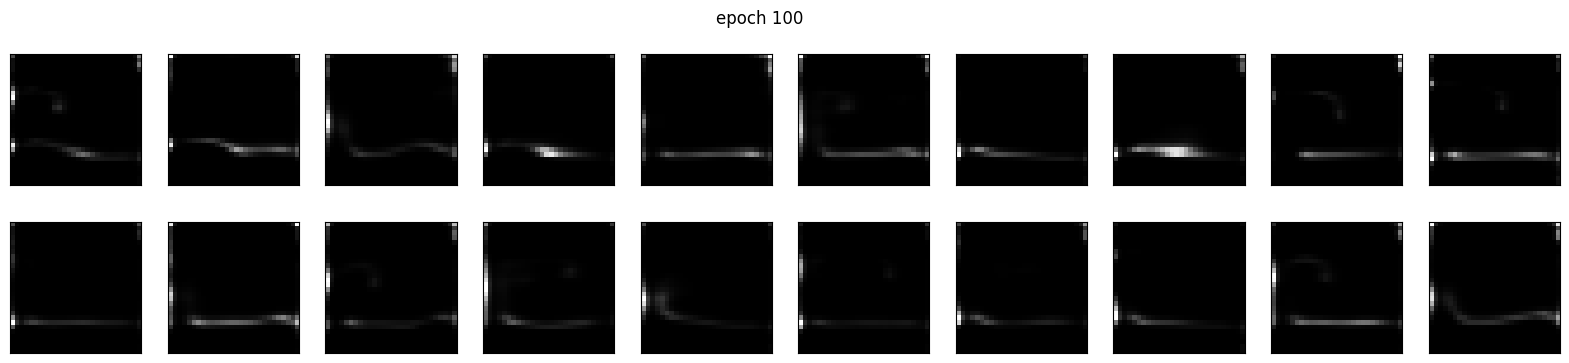

1/1 [==============================] - 0s 20ms/step


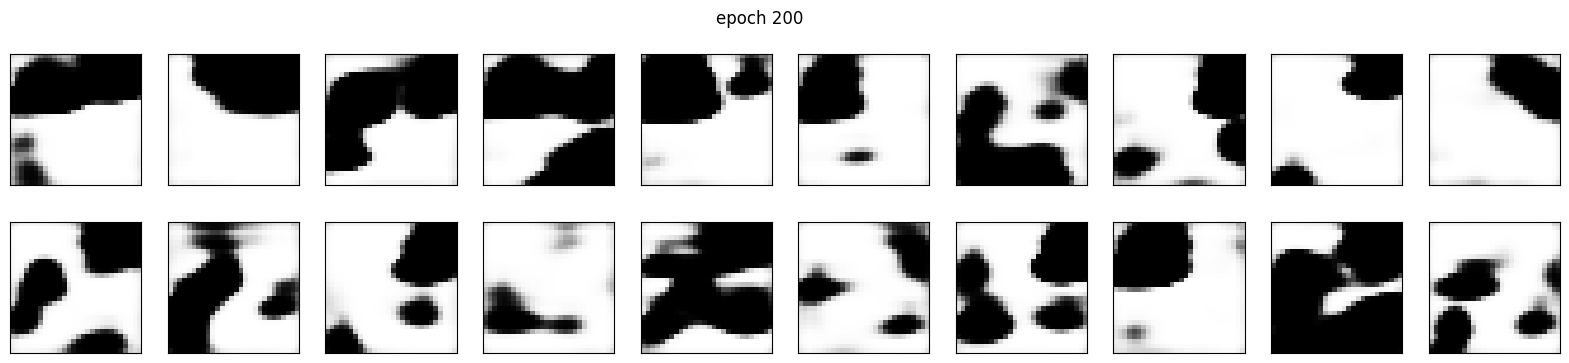

1/1 [==============================] - 0s 19ms/step


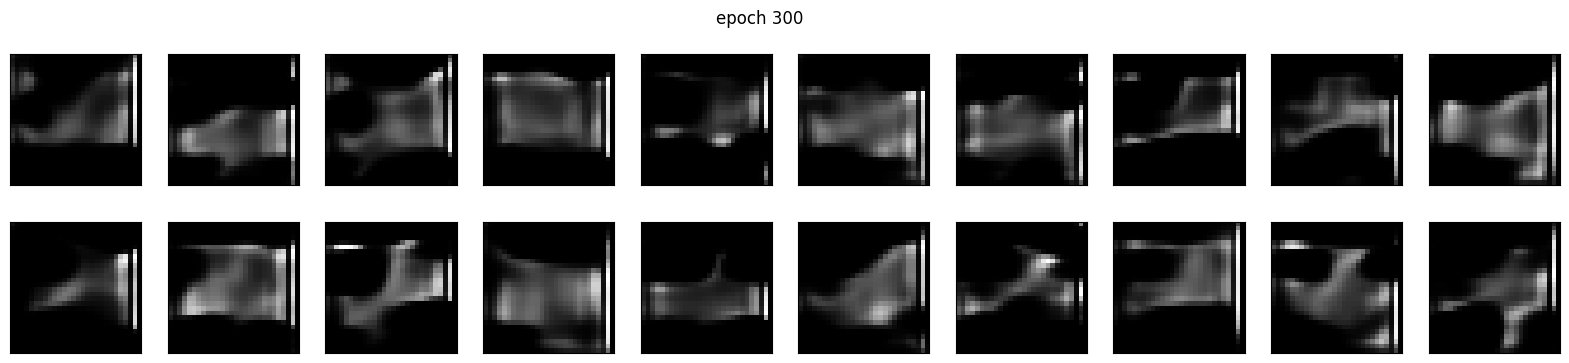

1/1 [==============================] - 0s 18ms/step


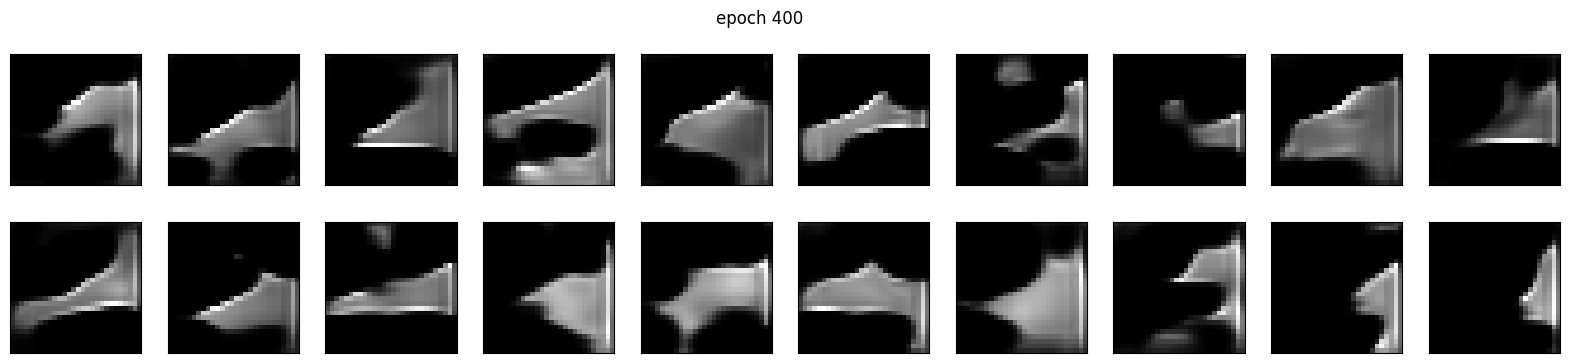

1/1 [==============================] - 0s 22ms/step


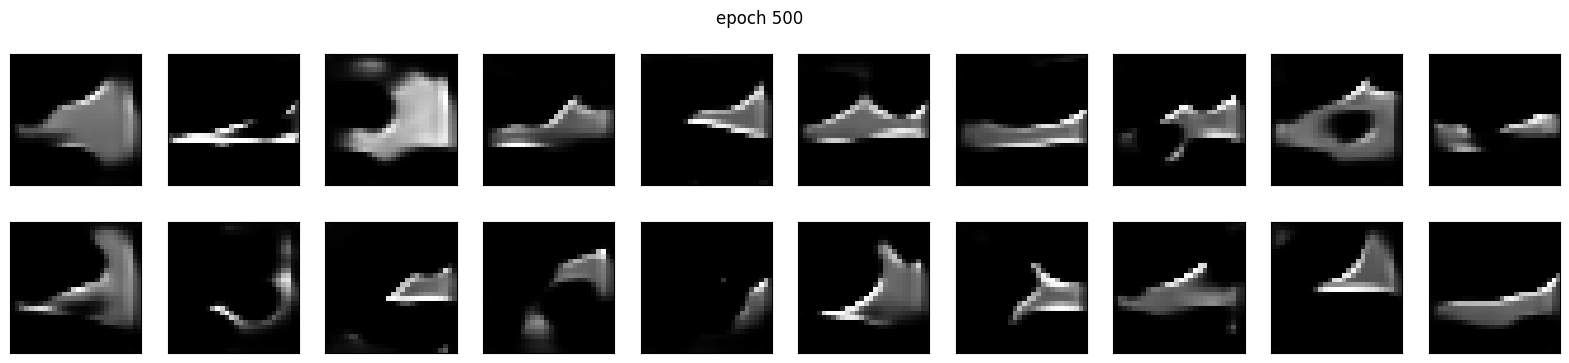

1/1 [==============================] - 0s 19ms/step


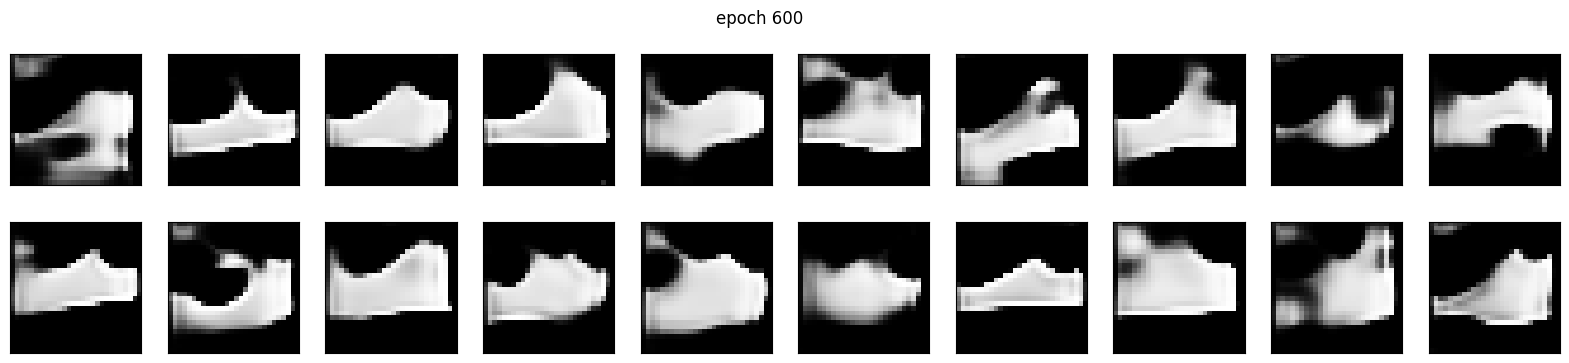

1/1 [==============================] - 0s 17ms/step


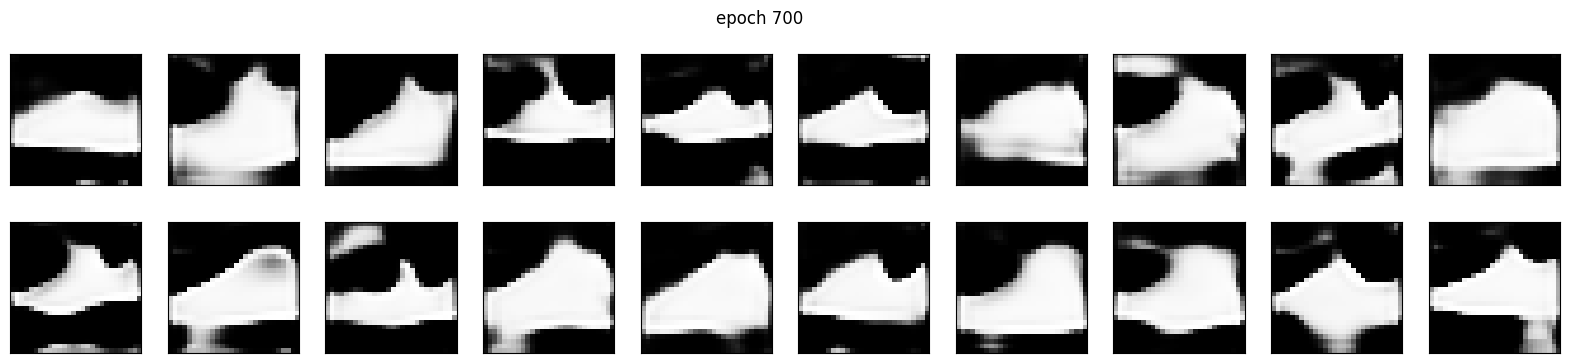

1/1 [==============================] - 0s 21ms/step


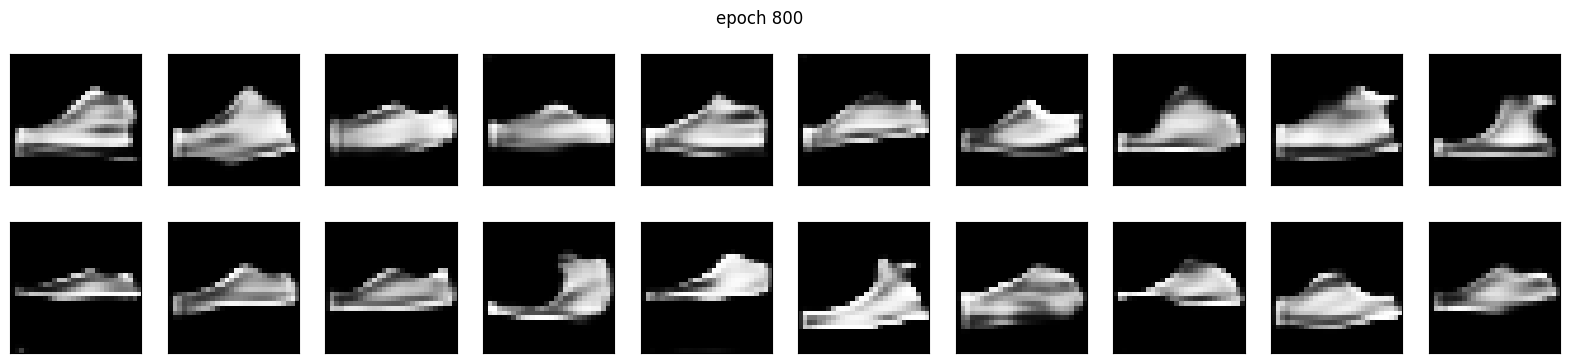

1/1 [==============================] - 0s 17ms/step


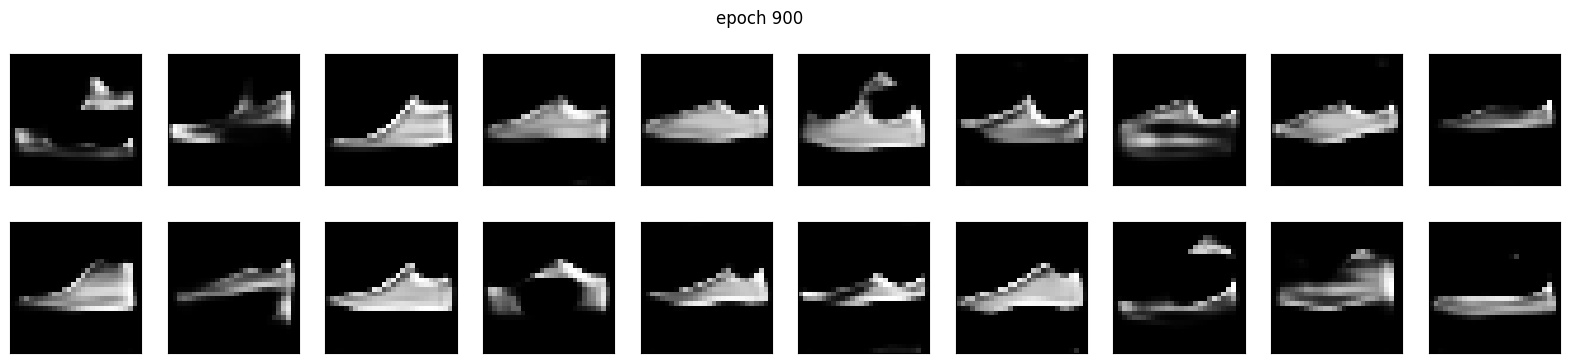

1/1 [==============================] - 0s 24ms/step


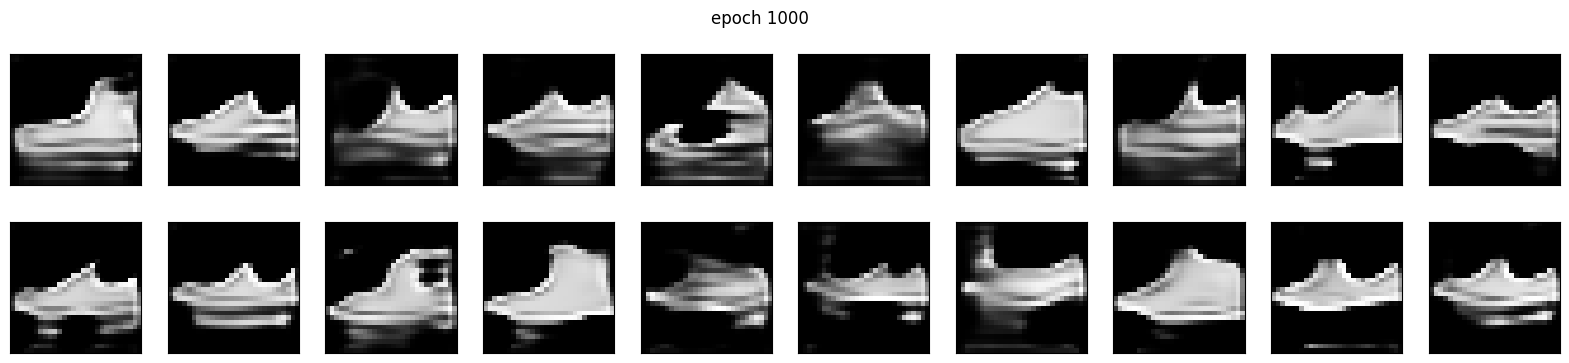


마지막 iteration에서의 판별망(D)의 real data에 대한 분별 accuracy:  0.8125
마지막 iteration에서의 판별망(D)의 fake data에 대한 분별 accuracy:  0.796875

2/2 [==============================] - 0s 4ms/step


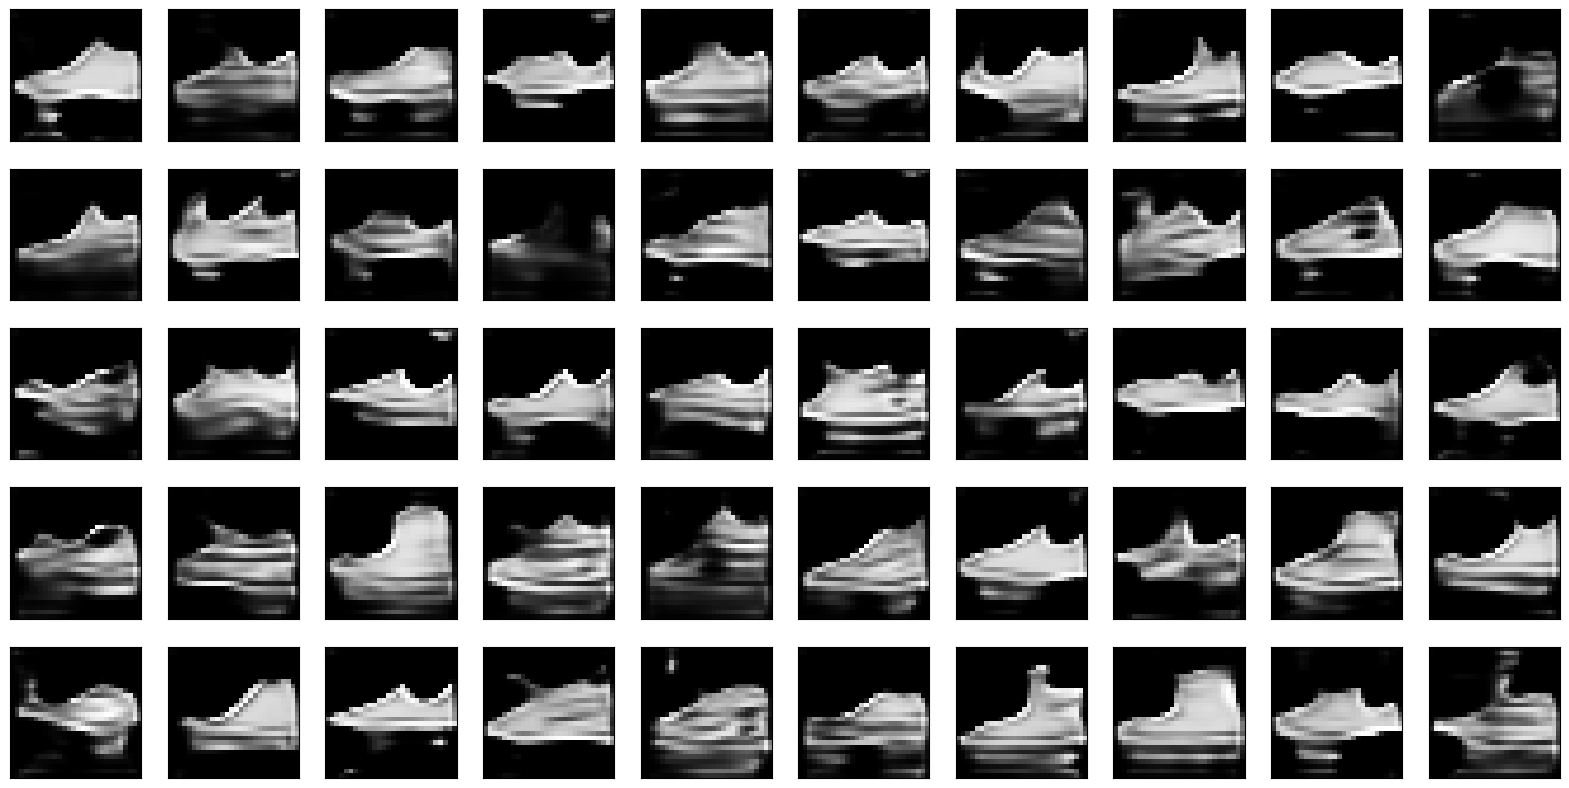

In [58]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input,Activation,Dense,Flatten,Reshape,Conv2D,Conv2DTranspose,Dropout,BatchNormalization,UpSampling2D,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train[np.isin(y_train,[7])] 
x_train = (x_train.astype('float32')/255.0)*2.0-1.0 # [-1,1] 구간
x_test = (x_test.astype('float32')/255.0)*2.0-1.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

batch_siz=64
iterations=1000
dropout_rate=0.4
batch_norm=0.9
zdim=100 # 잠복 공간의 차원

discriminator_input=Input(shape=(28, 28, 1)) # 분별망 D 설계
x=Conv2D(64,(5,5),activation='relu',padding='same',strides=(2,2))(discriminator_input)
x=Dropout(dropout_rate)(x)
x=Conv2D(64,(5,5),activation='relu',padding='same',strides=(2,2))(x)
x=Dropout(dropout_rate)(x)
x=Conv2D(128,(5,5),activation='relu',padding='same',strides=(2,2))(x)
x=Dropout(dropout_rate)(x)
x=Conv2D(128,(5,5),activation='relu',padding='same',strides=(1,1))(x)
x=Dropout(dropout_rate)(x)
x=Flatten()(x)
discriminator_output=Dense(1,activation='sigmoid')(x)
discriminator=Model(discriminator_input,discriminator_output)

generator_input=Input(shape=(zdim,)) # 생성망 G 설계
x=Dense(3136)(generator_input)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Reshape((7,7,64))(x)
x=UpSampling2D()(x)
x=Conv2D(128,(5,5),padding='same')(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=UpSampling2D()(x)
x=Conv2D(64,(5,5),padding='same')(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Conv2D(64,(5,5),padding='same')(x)
x=BatchNormalization(momentum=batch_norm)(x)
x=Activation('relu')(x)
x=Conv2D(1,(5,5),activation='tanh',padding='same')(x)
generator_output=x
generator=Model(generator_input,generator_output)

discriminator.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

discriminator.trainable=False
gan_input=Input(shape=(zdim,))
gan_output=discriminator(generator(gan_input))
gan=Model(gan_input,gan_output)
gan.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

real_acc=[]
fake_acc=[]

def train_discriminator(x_train):
    c=np.random.randint(0,x_train.shape[0],batch_siz)
    real=x_train[c]
    real_acc.append(discriminator.train_on_batch(real,np.ones((batch_siz,1))))

    p=np.random.normal(0,1,(batch_siz,zdim))
    fake=generator.predict(p)
    fake_acc.append(discriminator.train_on_batch(fake,np.zeros((batch_siz,1))))

def train_generator():
    p=np.random.normal(0,1,(batch_siz,zdim))
    gan.train_on_batch(p,np.ones((batch_siz,1)))



for i in range(1, iterations+1): # 학습을 수행
    train_discriminator(x_train)
    train_generator()
    if(i%100==0): # 학습 도중 100세대마다 중간 상황 출력
        plt.figure(figsize=(20, 4))
        plt.suptitle('epoch '+str(i))
        for k in range(20):
            plt.subplot(2,10,k+1)
            img=generator.predict(np.random.normal(0,1,(1,zdim)))
            plt.imshow(img[0].reshape(28,28),cmap='gray')
            plt.xticks([]); plt.yticks([])
        plt.show()

print()
print("마지막 iteration에서의 판별망(D)의 real data에 대한 분별 accuracy: ",real_acc[-1][1])
print("마지막 iteration에서의 판별망(D)의 fake data에 대한 분별 accuracy: ",fake_acc[-1][1])
print()
imgs=generator.predict(np.random.normal(0,1,(50,zdim)))
plt.figure(figsize=(20,10)) # 학습을 마친 후 50개 샘플을 생성하여 출력
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(imgs[i].reshape(28,28),cmap='gray')
    plt.xticks([]); plt.yticks([])        